<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-расчета-эффективности" data-toc-modified-id="Проверка-расчета-эффективности-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка расчета эффективности</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Анализ признаков</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-дубликаты" data-toc-modified-id="Проверка-на-дубликаты-1.3.1"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Проверка на дубликаты</a></span></li><li><span><a href="#Анализ-и-заполнение-пропусков" data-toc-modified-id="Анализ-и-заполнение-пропусков-1.3.2"><span class="toc-item-num">1.3.2&nbsp;&nbsp;</span>Анализ и заполнение пропусков</a></span></li></ul></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изменение-концентрации-металлов" data-toc-modified-id="Изменение-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изменение концентрации металлов</a></span></li><li><span><a href="#Сравнение-размеров-гранул" data-toc-modified-id="Сравнение-размеров-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Сравнение размеров гранул</a></span></li><li><span><a href="#Суммарная-концетрация" data-toc-modified-id="Суммарная-концетрация-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концетрация</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Проверка-на-тестовой-выборке" data-toc-modified-id="Проверка-на-тестовой-выборке-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Проверка на тестовой выборке</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [58]:
import pandas as pd
import sklearn.metrics
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import  make_scorer
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso


from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.dummy import DummyRegressor


In [59]:
train =pd.read_csv('/datasets/gold_recovery_train_new.csv')
test =pd.read_csv('/datasets/gold_recovery_test_new.csv')
full =pd.read_csv('/datasets/gold_recovery_full_new.csv')

### Проверка расчета эффективности

In [60]:
#функция для расчета эффективности

def recovery(c,f,t):
    return c*(f-t)/f/(c-t)*100

In [61]:
train['recovery_test'] = recovery(train['rougher.output.concentrate_au'],
                         train['rougher.input.feed_au'],
                         train['rougher.output.tail_au'])

sklearn.metrics.mean_absolute_error(train['rougher.output.recovery'],train['recovery_test'])


1.0748911125799084e-14

Из MAE видно, что эффективность обогащения рассчитана правильно. Средняя ошибка почти равна нулю

### Анализ признаков

Сначала выясним, какие признаки недоступны в тестовой выборке

In [62]:
[item for item in train.columns if item not in test.columns] 


['final.output.concentrate_ag',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'final.output.tail_au',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'primary_cleaner.output.tail_au',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.au_pb_ratio',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.concentrate_au',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_pb',
 'rougher.output.ta

В наборе тестовых данных отстуствуют паремтры output для всех этапов процесса. Это те параметры, которые не известны, поэтому и нужно составить прогноз. Также отсутствуют значения рассчитанных параметров. Сразу выкинем их из обучающей выборки

В тестовой выборке также не хватает целевых признаков. Их возьмем из датасета full, совместив значения по дате

In [63]:
target_columns = ['final.output.recovery','rougher.output.recovery']
columns_to_drop = [item for item in train.columns if item not in test.columns and item not in target_columns]

#удаляем из обучающей выборки ненужные параметры
train.drop(columns = columns_to_drop, inplace=True)

#добавляем в тестовую выборку целевые признаки по дате
test = test.merge(full[['final.output.recovery','rougher.output.recovery','date']], how='left', on='date')


### Предобработка данных

#### Проверка на дубликаты

In [64]:
display(train.duplicated().sum())
test.duplicated().sum()

0

0

Повторов в обучающей и тестовой выборке нет

#### Анализ и заполнение пропусков

In [65]:
train.isna().sum()

date                                            0
final.output.recovery                           0
primary_cleaner.input.sulfate                  20
primary_cleaner.input.depressant               32
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                100
primary_cleaner.state.floatbank8_a_air          4
primary_cleaner.state.floatbank8_a_level        1
primary_cleaner.state.floatbank8_b_air          4
primary_cleaner.state.floatbank8_b_level        1
primary_cleaner.state.floatbank8_c_air          2
primary_cleaner.state.floatbank8_c_level        1
primary_cleaner.state.floatbank8_d_air          3
primary_cleaner.state.floatbank8_d_level        1
rougher.input.feed_ag                           0
rougher.input.feed_pb                         100
rougher.input.feed_rate                         8
rougher.input.feed_size                       144
rougher.input.feed_sol                         78
rougher.input.feed_au                           0


В целевых признаках пропусков нет. Есть около 3% пропусков в rougher.input.floatbank11_xanthate и rougher.state.floatbank10_e_air. Если они не пересекаются, то удалением пропусков можем в сумме лишиться до 10% данных, это много. Так как дано, что близкие по дате данные похожи друг на друга, можно заменить пропуски предыдущим значением.

Сначала проверим, как распределяются данные на примере признака с большим числом пропусков

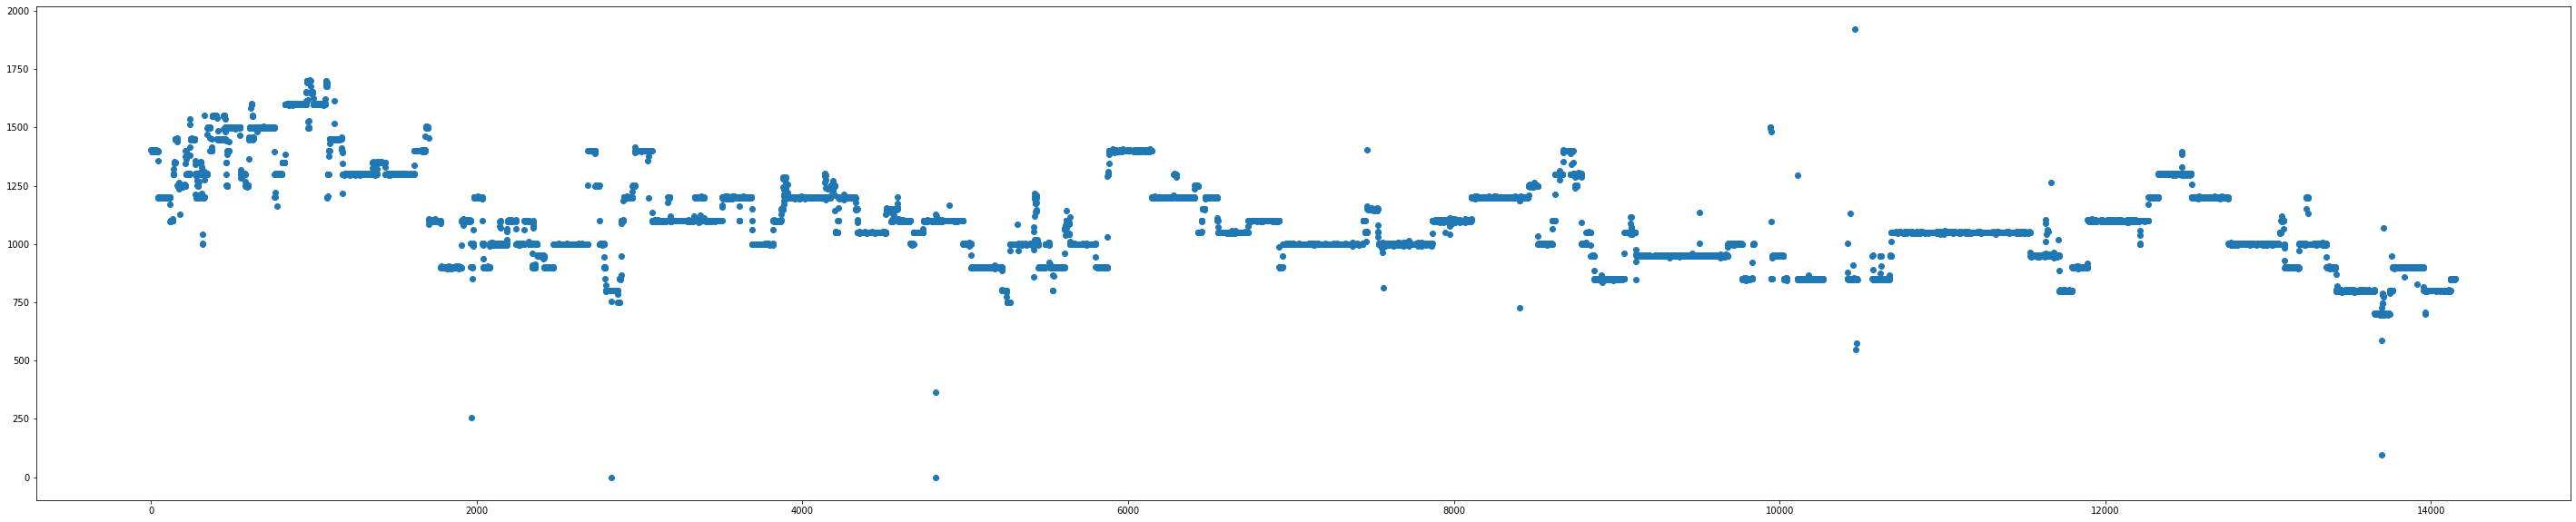

In [66]:

plt.figure(figsize=(50,10))

plt.scatter(x = train.index, y = train['rougher.state.floatbank10_e_air'])
plt.show()

Видно, что соседние значения обычно близки друг к другу, но есть и скачки. Поэтому заменим пропуски средним значением между предыдущим и следующим

In [67]:
train.interpolate(inplace=True)

Теперь посмотрим на пропуски в тестовой выборке

In [68]:
test.isna().sum()

date                                           0
primary_cleaner.input.sulfate                  4
primary_cleaner.input.depressant               5
primary_cleaner.input.feed_size                0
primary_cleaner.input.xanthate                 4
primary_cleaner.state.floatbank8_a_air         0
primary_cleaner.state.floatbank8_a_level       0
primary_cleaner.state.floatbank8_b_air         0
primary_cleaner.state.floatbank8_b_level       0
primary_cleaner.state.floatbank8_c_air         0
primary_cleaner.state.floatbank8_c_level       0
primary_cleaner.state.floatbank8_d_air         0
primary_cleaner.state.floatbank8_d_level       0
rougher.input.feed_ag                          0
rougher.input.feed_pb                          0
rougher.input.feed_rate                        3
rougher.input.feed_size                        1
rougher.input.feed_sol                        21
rougher.input.feed_au                          0
rougher.input.floatbank10_sulfate              5
rougher.input.floatb

В тестовой выборке пропуском совсем мало. Заполнять нецелесообразно, можно просто их удалить 

In [69]:
test.dropna(inplace=True)

## Анализ данных

### Изменение концентрации металлов

In [70]:
au = pd.DataFrame()

au['rougher'] = full['rougher.output.concentrate_au']
au['primary'] = full['primary_cleaner.output.concentrate_au']
au['final'] = full['final.output.concentrate_au']

ag = pd.DataFrame()
ag['rougher'] = full['rougher.output.concentrate_ag']
ag['primary'] = full['primary_cleaner.output.concentrate_ag']
ag['final'] = full['final.output.concentrate_ag']


pb = pd.DataFrame()
pb['rougher'] = full['rougher.output.concentrate_pb']
pb['primary'] = full['primary_cleaner.output.concentrate_pb']
pb['final'] = full['final.output.concentrate_pb']

sol = pd.DataFrame()
sol['rougher'] = full['rougher.output.concentrate_sol']
sol['primary'] = full['primary_cleaner.output.concentrate_sol']
sol['final'] = full['final.output.concentrate_sol']

In [71]:
display(au.mean())

display(ag.mean())

pb.mean()

rougher    19.772000
primary    32.119400
final      44.076513
dtype: float64

rougher    11.994759
primary     8.442408
final       5.168470
dtype: float64

rougher    7.606272
primary    9.829530
final      9.978895
dtype: float64

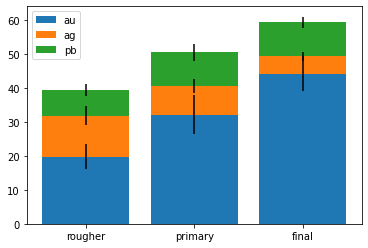

In [72]:
fig, ax = plt.subplots()
labels = ['rougher', 'primary', 'final']
ax.bar(labels,au.mean(), label ='au', yerr = au.std())
ax.bar(labels,ag.mean(), label ='ag', yerr = ag.std(), bottom = au.mean())
ax.bar(labels,pb.mean(), label ='pb', yerr = pb.std(), bottom = ag.mean()+au.mean())
#ax.bar(labels,sol.mean(), label ='sol', yerr = sol.std(), bottom = ag.mean()+au.mean()+pb.mean())
ax.legend()

Концентрация золота на этапах от сырья до финального вырастает от примерно 20% до 44%. Количество серебра снижается от 11% до 5%, а свинец, наоборот — добавляется на стадии первичной очистки

### Сравнение размеров гранул

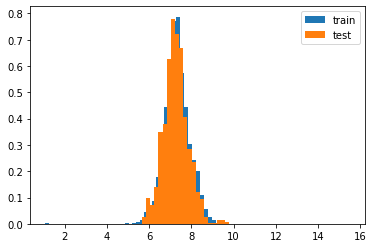

In [73]:
plt.hist(train['primary_cleaner.input.feed_size'], bins=50, label='train',density=True)
plt.hist(test['primary_cleaner.input.feed_size'], bins=50, label='test',density=True)
plt.legend()
plt.show()

In [74]:
ttest_ind(train['primary_cleaner.input.feed_size'],
          test['primary_cleaner.input.feed_size']).pvalue

2.9804815000366216e-07

Статистический тест показывает, что различие в среднем размере гранул в тестовой и обучающей выборке статистически значимо. Однако зрительно видно, что сами распределения очень похожи. Вероятно, дело в слишком большом различии в количестве данных. 

### Суммарная концетрация

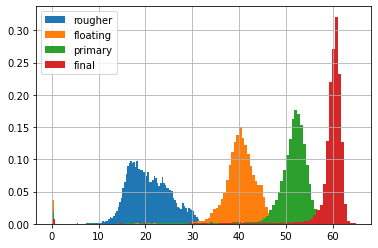

In [75]:
full_concentrate = pd.DataFrame()

full_concentrate['rougher'] = full['rougher.input.feed_ag']+full['rougher.input.feed_pb'] + full['rougher.input.feed_au']     
full_concentrate['rougher'].hist(bins=100, label = 'rougher',density=True)
full_concentrate['rougher'].describe()    

full_concentrate['floating'] = full['rougher.output.concentrate_ag']+full['rougher.output.concentrate_pb']+ full['rougher.output.concentrate_au']     
full_concentrate['floating'].hist(bins=100, label = 'floating',density=True)
full_concentrate['floating'].describe()

full_concentrate['primary'] = full['primary_cleaner.output.concentrate_ag']+full['primary_cleaner.output.concentrate_pb'] + full['primary_cleaner.output.concentrate_au']     
full_concentrate['primary'].hist(bins=100, label = 'primary',density=True)
full_concentrate['primary'].describe()


full_concentrate['final'] = full['final.output.concentrate_ag']+full['final.output.concentrate_pb']+full['final.output.concentrate_au']     
full_concentrate['final'].hist(bins=100, label = 'final',density=True)
full_concentrate['final'].describe()

plt.legend()


Видно, что с каждым шагом обогащения суммарная концентрация металлов возрастает, а само распределение становится уже. Это означает, что обогащение работает

На некоторых или всех этапах есть нулевые значения. Вероятно, это ошибочные записи, их следует удалить. 

Однако из всех четырех параметров использоваться для обучения будет только один -- rougher.input.feed_. Остальные данные считаются неизвестными, их использовать не будем

In [76]:
display(train[train['rougher.input.feed_au']==0]['date'].count())
display(train[train['rougher.input.feed_ag']==0]['date'].count())
display(train[train['rougher.input.feed_pb']==0]['date'].count())

0

0

0

В интересующем нас признаке аномальных нулей нет

## Модель

In [77]:
#функция для подсчета необходимой метрики качества

def smape_score(y_true, y_pred):
    
    smape = abs(y_true-y_pred)/(abs(y_true)+abs(y_pred))*2*100
    return smape.sum()/len(y_true)

smape_scorer = make_scorer(smape_score,greater_is_better = False)

Будем обучать модели отдельно для эффективности обогащения чернового и финального концентратов

In [78]:
#разделение признаков в обучающей выборке

x_train = train.drop(columns=target_columns).drop(columns='date')
y_final_train = train['final.output.recovery']
y_rougher_train = train['rougher.output.recovery']

In [79]:
#разделение признаков в тестовой выборке

x_test = test.drop(columns=target_columns).drop(columns='date')
y_final_test = test['final.output.recovery']
y_rougher_test=test['rougher.output.recovery']

In [80]:
#масштабирование признаков

scaler = StandardScaler().fit(x_train)

x_train = pd.DataFrame(scaler.transform(x_train),
                        index = x_train.index, 
                        columns = x_train.columns)

x_test = pd.DataFrame(scaler.transform(x_test),
                        index = x_test.index, 
                        columns = x_test.columns)

Будем сравнивать несколько линейных моделей и модель случайного леса. Для последней сначала подберем лучшие гиперпараметры

In [81]:
%%time
RFR = RandomForestRegressor(random_state=1)

RFR_parameters = {'max_depth'    : [3,4,5,6],
                  'n_estimators' : [60,70,80]
                 }

grid_RFR = GridSearchCV(estimator=RFR, param_grid = RFR_parameters, cv = 5, n_jobs=-1, scoring=smape_scorer)
grid_RFR.fit(x_train, y_rougher_train)


CPU times: user 9min 32s, sys: 294 ms, total: 9min 33s
Wall time: 9min 33s


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6],
                         'n_estimators': [60, 70, 80]},
             scoring=make_scorer(smape_score, greater_is_better=False))

In [82]:
grid_RFR.best_params_

{'max_depth': 6, 'n_estimators': 80}

In [83]:
#список моделей для перебора
models = [LinearRegression(),ElasticNet(random_state=1), Lasso(random_state=1),RandomForestRegressor(n_estimators=80,max_depth=6,random_state=1)]


In [90]:
%%time


results = pd.DataFrame(columns =['model','rougher smape','final smape'])

smape_scorer = make_scorer(smape_score)

#проверка качества моделей кросс-валидацией и сравнение между собой

for model in models:
    scores_rough = cross_val_score(model,x_train,y_rougher_train,cv=5,scoring=smape_scorer)
    scores_final = cross_val_score(model,x_train,y_final_train,cv=5,scoring=smape_scorer)
    results = results.append({'model': model,
                                'rougher smape': scores_rough.mean(), 
                                'final smape':scores_final.mean()}, 
                             ignore_index=True)    
    
results['overall smape'] = .25*results['rougher smape']+.75*results['final smape']
results

CPU times: user 2min 17s, sys: 7.13 s, total: 2min 24s
Wall time: 2min 24s


,model,rougher smape,final smape,overall smape
0,LinearRegression(),12.767081,12.268816,12.393382
1,ElasticNet(random_state=1),11.000173,10.116052,10.337082
2,Lasso(random_state=1),11.040036,10.180669,10.395510
3,"RandomForestRegressor(max_depth=6, n_estimator...",10.957621,10.394840,10.535535


Лучше всего показала себя модель ElasticNet

### Проверка на тестовой выборке

In [85]:
%%time

y_rougher_pred  = ElasticNet(random_state=1).fit(x_train,y_rougher_train).predict(x_test)
y_final_pred  = ElasticNet(random_state=1).fit(x_train,y_final_train).predict(x_test)


.25*smape_score(y_rougher_test, y_rougher_pred)+.75*smape_score(y_final_test, y_final_pred)

CPU times: user 138 ms, sys: 471 ms, total: 609 ms
Wall time: 557 ms


8.316508408898168

In [100]:
%%time

y_rougher_pred  = ElasticNet(random_state=1,l1_ratio=1).fit(x_train,y_rougher_train).predict(x_test)
y_final_pred  = ElasticNet(random_state=1,l1_ratio=1).fit(x_train,y_final_train).predict(x_test)


.25*smape_score(y_rougher_test, y_rougher_pred)+.75*smape_score(y_final_test, y_final_pred)

CPU times: user 133 ms, sys: 379 ms, total: 512 ms
Wall time: 457 ms


8.232146124876145

На тестовой выборке результат получился лучше, чем на обучающей

Итоговая sMAPE составила около 8%

In [92]:
dummy_final_pred = DummyRegressor().fit(x_train,y_final_train).predict(x_test)
dummy_rougher_pred = DummyRegressor().fit(x_train,y_rougher_train).predict(x_test)

.25*smape_score(y_rougher_test,dummy_rougher_pred)+.75*smape_score(y_final_test, dummy_final_pred)



9.875451652283319

Для константной модели sMAPE почти такой же. Получается, об адекватности модели говорить нельзя

**Вывод**

 - построена модель для предсказания эффективности восстановления золота из руды
 - среди нескольких моделей выбрана лучшая, которая дала требуемую метрику sMAPE 10,33%
 - на тестовой выборке sMAPE составила 8,3%
 - По сравнению с константной, модель не вполне адекватная
 - Нужно искать другие модели, которые дадут sMAPE меньше

 